In [1]:
import numpy as np
np.seterr(all='raise')
import matplotlib.pyplot as plt

In [2]:
def lstsqAndPlot(vecX, vecY, signumFlag):
    w1, w0 = leastSquare(vecX, vecY)
    plotData(vecX, vecY)
    plotFittedLine(vecX, w1, w0)
    if(signumFlag):
        plotSignum(w1, w0)
    showData()

def leastSquare(vecX, vecY):
    A = np.vstack([vecX, np.ones(len(vecX))])
    w1, w0 = np.linalg.lstsq(A.T, vecY, rcond=None)[0]
    return w1, w0
    
def plotData(vecX, vecY):
    plt.plot(vecX, vecY, 'o', label='Original data', markersize=10)
    
def plotFittedLine(vecX, w1, w0):
    plt.plot(vecX, w1*vecX + w0, 'r', label='Fitted line')
    
def plotSignum(w1, w0):
    xIntercept = getXIntercept(w1, w0)
    plt.hlines(-1, plt.xlim()[0], xIntercept, label='sign(Fitted line)')
    plt.hlines(1, xIntercept, plt.xlim()[1])
    plt.vlines(xIntercept, -1, 1)
    
def getXIntercept(w1, w0):
    return (-w0/w1)

def showData():
    plt.legend()
    plt.show()

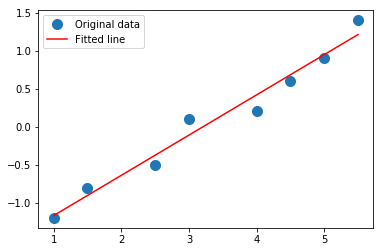

In [3]:
vecX = np.array ([1.0, 1.5, 2.5, 3.0, 4.0, 4.5, 5.0, 5.5])
vecY = np.array ([-1.2 , -0.8, -0.5, 0.1, 0.2, 0.6, 0.9, 1.4])
lstsqAndPlot(vecX, vecY, False)

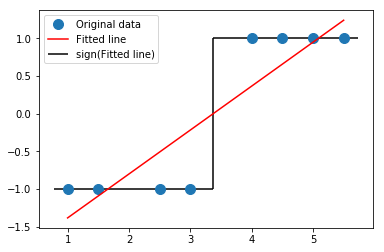

In [4]:
vecX = np.array ( [1.0, 1.5, 2.5, 3.0, 4.0, 4.5, 5.0, 5.5])
vecY = np.array ( [-1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0])
lstsqAndPlot(vecX, vecY, True)

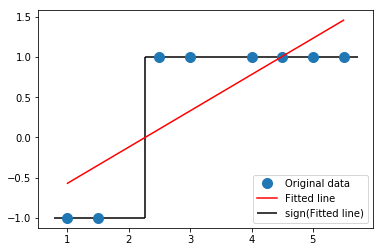

In [5]:
vecX = np.array ( [1.0, 1.5, 2.5, 3.0, 4.0, 4.5, 5.0, 5.5])
vecY = np.array ( [-1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
lstsqAndPlot(vecX, vecY, True)

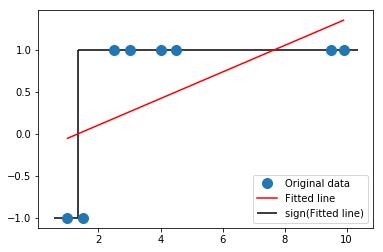

In [6]:
vecX = np.array ( [1.0, 1.5, 2.5, 3.0, 4.0, 4.5, 9.5, 9.9])
vecY = np.array ( [-1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
lstsqAndPlot(vecX, vecY, True)

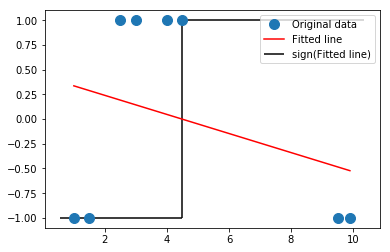

In [7]:
vecX = np.array ( [1.0, 1.5, 2.5, 3.0, 4.0, 4.5, 9.5, 9.9])
vecY = np.array ( [-1.0, -1.0, 1.0, 1.0, 1.0,1.0, -1.0, -1.0])
lstsqAndPlot(vecX, vecY, True)

Plausibel sind die Ergebnisse stets, da erkennbar ist, dass die Linien die Distanz zu allen Punkten versuchen zu verringern. Nur beim letzten Beispiel ist überraschend, dass die sign-Funktion weniger als die Hälfte der Punkte durchläuft.
Problematisch ist, dass manchmal ein lineares Modell offensichtlich nicht geeignet ist um die Daten zu modellieren. Dies wird gerade unter Betrachtung des letzten Beispiels klar.
Das in Frage stehende Modell (zweite) ist einigermaßen plausibel, da es einen globalen Trend erfasst. Dies lässt sich dadurch zurückführen, dass die sign-Fkt von der tanh-Fkt approximiert wird, welche wiederum taylorentwickelt mit Entwicklungspunkt x=0 durch eine lineare Funktion approximiert werden kann.